# Library

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, plot_confusion_matrix, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import train_test_split

# Dataset

In [3]:
df = pd.read_csv("../Models/data_tofit.csv")
df

,Age,Gender,Education,Nscore,Escore,Oscore,Ascore,Cscore,SS,Amphet,Amyl,Benzos,Cannabis,Heroin,Ketamine,LSD,Meth,VSA,Addiction
0,0.49788,0.48246,-0.05921,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-1.18084,1,0,1,0,0,0,0,0,0,No Addiction
1,-0.07854,-0.48246,1.98437,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.21575,1,1,0,1,0,1,1,1,0,Addiction without psychologic effect
2,0.49788,-0.48246,-0.05921,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,0.40148,0,0,0,1,0,0,0,0,0,No Addiction
3,-0.95197,0.48246,1.16365,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.18084,0,0,1,1,0,1,0,0,0,No Addiction
4,0.49788,0.48246,1.98437,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21575,0,0,0,1,0,0,0,0,0,No Addiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,0.48246,-0.61113,-1.19430,1.74091,1.88511,0.76096,-1.13788,1.92173,0,0,0,1,0,0,1,0,1,Addiction without psychologic effect
1881,-0.95197,-0.48246,-0.61113,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.76540,0,0,0,1,0,0,1,1,0,Addiction without psychologic effect
1882,-0.07854,0.48246,0.45468,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,-0.52593,1,1,1,1,0,1,1,0,0,Addiction with psychologic effect
1883,-0.95197,0.48246,-0.61113,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.22470,0,0,0,1,0,0,1,0,0,Addiction with psychologic effect


# Test/train

In [4]:
# Split train test
X_train, X_test, y_train, y_test = train_test_split(df.drop("Addiction", axis = 1), df["Addiction"], test_size=0.35, random_state = 42,\
                                                   stratify = df["Addiction"])

# AdaBoost Model

In [19]:
param = {"learning_rate": [0.001,0.01,0.1,1, 2, 5],
        'n_estimators': [1,50,100, 500, 1000]}

In [20]:
AdaBoost_Grid = GridSearchCV(AdaBoostClassifier(), param, cv= KFold(n_splits=5, random_state=42, shuffle = True),scoring = "accuracy")
AdaBoost_Grid.fit(X_train, y_train)
AdaBoost_Grid

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 2, 5],
                         'n_estimators': [1, 50, 100, 500, 1000]},
             scoring='accuracy')

In [21]:
print("Best parameters {} with best score {} ".format(AdaBoost_Grid.best_params_,\
AdaBoost_Grid.best_score_))

Best parameters {'learning_rate': 0.1, 'n_estimators': 500} with best score 0.9028571428571428 


In [22]:
# Testing model
y_pred = AdaBoost_Grid.predict(X_test)
accuracy_score(y_test, y_pred)

0.9151515151515152

In [23]:
cross = pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predicted'], margins=True)
cross

Predicted,Addiction with psychologic effect,Addiction without psychologic effect,No Addiction,All
Real,,,,
Addiction with psychologic effect,166,13,4,183
Addiction without psychologic effect,10,163,6,179
No Addiction,12,11,275,298
All,188,187,285,660


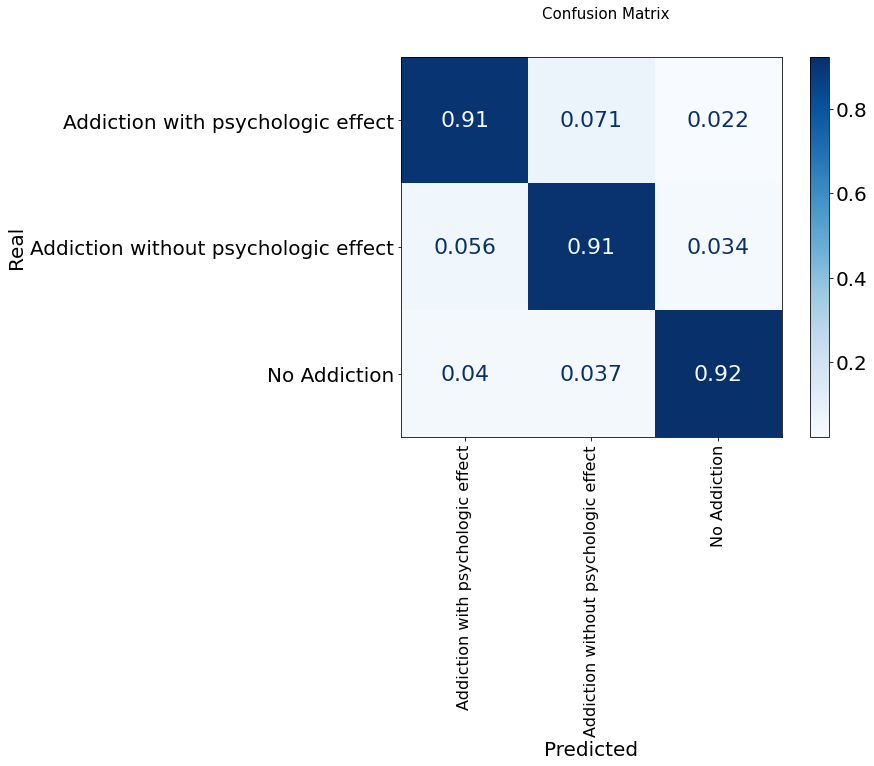

In [24]:
# Confusion Matrix

plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(1, 1, figsize=(10,7))
fig.suptitle('Confusion Matrix', fontsize=15)
plot_confusion_matrix(AdaBoost_Grid, X_test, y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.xlabel('Predicted')
plt.xticks(rotation =90)
plt.ylabel('Real')
plt.show() 

In [25]:
# Importance Featuring

importance = pd.DataFrame(data=AdaBoost_Grid.best_estimator_.feature_importances_, columns = ['Value'],\
index=X_test.columns).reset_index().rename(columns={'index':'Variable'}).sort_values('Value').reset_index(drop=True)
importance['%'] = importance['Value']*100
importance

,Variable,Value,%
0,Heroin,0.000,0.0
1,Benzos,0.000,0.0
2,Amyl,0.000,0.0
3,Gender,0.012,1.2
4,VSA,0.020,2.0
5,Meth,0.020,2.0
6,Amphet,0.022,2.2
7,Ketamine,0.024,2.4
8,LSD,0.032,3.2
9,Cannabis,0.032,3.2


<BarContainer object of 18 artists>

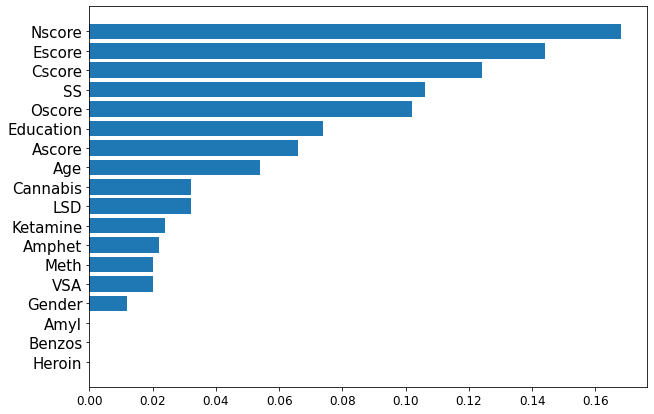

In [26]:
# Model importance
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(10,7))
plt.barh(importance['Variable'], importance['Value'])

We can Remove Amyl, Benzos, Heroin

## Removing features

In [31]:
# Split train test
df_important = df.drop(["Amyl", "Benzos","Heroin"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(df_important.drop("Addiction", axis = 1), df_important["Addiction"], test_size=0.35, random_state = 42,\
                                                   stratify = df_important["Addiction"])

In [32]:
AdaBoost_Grid = GridSearchCV(AdaBoostClassifier(), param, cv= KFold(n_splits=5, random_state=42, shuffle = True),scoring = "accuracy")
AdaBoost_Grid.fit(X_train, y_train)
AdaBoost_Grid

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 2, 5],
                         'n_estimators': [1, 50, 100, 500, 1000]},
             scoring='accuracy')

In [33]:
print("Best parameters {} with best score {} ".format(AdaBoost_Grid.best_params_,\
AdaBoost_Grid.best_score_))

Best parameters {'learning_rate': 0.1, 'n_estimators': 500} with best score 0.9044897959183673 


In [34]:
# Testing model
y_pred = AdaBoost_Grid.predict(X_test)
accuracy_score(y_test, y_pred)

0.9151515151515152

In [35]:
cross = pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predicted'], margins=True)
cross

Predicted,Addiction with psychologic effect,Addiction without psychologic effect,No Addiction,All
Real,,,,
Addiction with psychologic effect,166,13,4,183
Addiction without psychologic effect,10,163,6,179
No Addiction,12,11,275,298
All,188,187,285,660


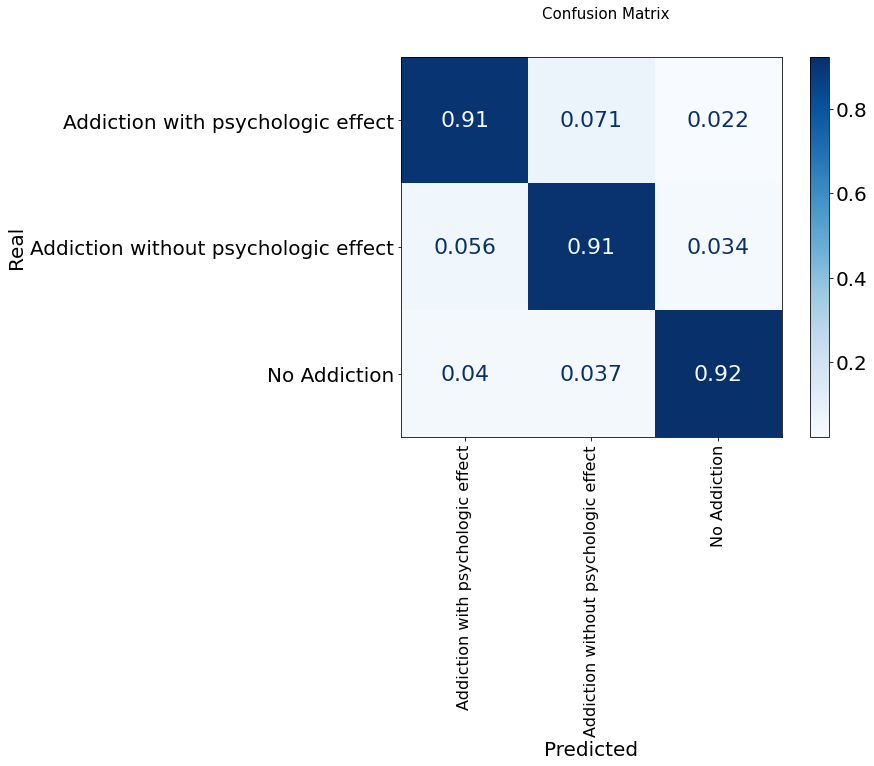

In [36]:
# Confusion Matrix

plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(1, 1, figsize=(10,7))
fig.suptitle('Confusion Matrix', fontsize=15)
plot_confusion_matrix(AdaBoost_Grid, X_test, y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.xlabel('Predicted')
plt.xticks(rotation =90)
plt.ylabel('Real')
plt.show() 

In [37]:
# Importance Featuring

importance = pd.DataFrame(data=AdaBoost_Grid.best_estimator_.feature_importances_, columns = ['Value'],\
index=X_test.columns).reset_index().rename(columns={'index':'Variable'}).sort_values('Value').reset_index(drop=True)
importance['%'] = importance['Value']*100
importance

,Variable,Value,%
0,Gender,0.012,1.2
1,Meth,0.020,2.0
2,VSA,0.020,2.0
3,Amphet,0.022,2.2
4,Ketamine,0.024,2.4
5,Cannabis,0.032,3.2
6,LSD,0.032,3.2
7,Age,0.054,5.4
8,Ascore,0.066,6.6
9,Education,0.074,7.4


<BarContainer object of 15 artists>

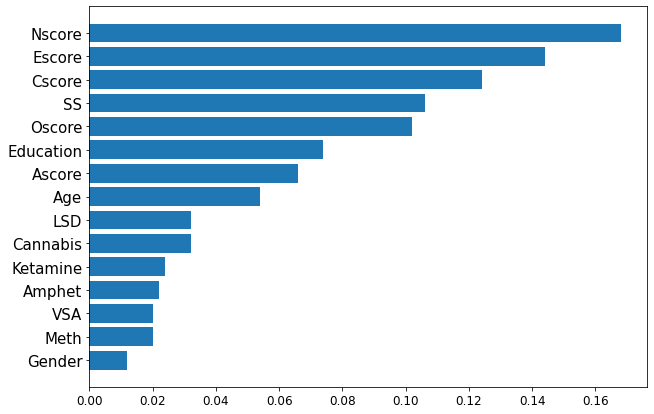

In [38]:
# Model importance
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(10,7))
plt.barh(importance['Variable'], importance['Value'])

## Removing all with above 5% importance

In [40]:
# Split train test
df_important = df.drop(["Amyl", "Benzos","Heroin","LSD","Cannabis","Ketamine","Amphet","VSA","Meth","Gender"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(df_important.drop("Addiction", axis = 1), df_important["Addiction"], test_size=0.35, random_state = 42,\
                                                   stratify = df_important["Addiction"])

In [41]:
AdaBoost_Grid = GridSearchCV(AdaBoostClassifier(), param, cv= KFold(n_splits=5, random_state=42, shuffle = True),scoring = "accuracy")
AdaBoost_Grid.fit(X_train, y_train)
AdaBoost_Grid

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 2, 5],
                         'n_estimators': [1, 50, 100, 500, 1000]},
             scoring='accuracy')

In [42]:
print("Best parameters {} with best score {} ".format(AdaBoost_Grid.best_params_,\
AdaBoost_Grid.best_score_))

Best parameters {'learning_rate': 0.1, 'n_estimators': 500} with best score 0.8465306122448979 


In [43]:
# Testing model
y_pred = AdaBoost_Grid.predict(X_test)
accuracy_score(y_test, y_pred)

0.8803030303030303

In [44]:
cross = pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predicted'], margins=True)
cross

Predicted,Addiction with psychologic effect,Addiction without psychologic effect,No Addiction,All
Real,,,,
Addiction with psychologic effect,165,5,13,183
Addiction without psychologic effect,6,159,14,179
No Addiction,20,21,257,298
All,191,185,284,660


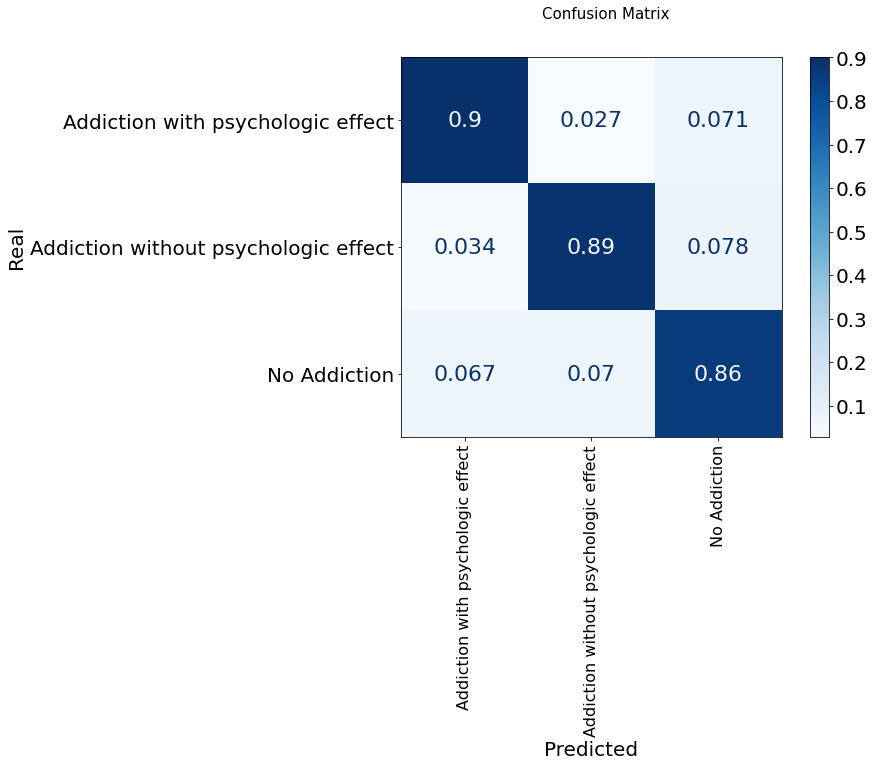

In [45]:
# Confusion Matrix

plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(1, 1, figsize=(10,7))
fig.suptitle('Confusion Matrix', fontsize=15)
plot_confusion_matrix(AdaBoost_Grid, X_test, y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.xlabel('Predicted')
plt.xticks(rotation =90)
plt.ylabel('Real')
plt.show() 

# Conlusion Adaboost

- Only three non-important features can be removed: Heroin, Amyl and Benzos
- 91.15 % acccuracy on test set
- Good model